# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm


# Data loading and intial cleaning

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_Never.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(2072, 62) (2072,)


# Splitting The data

In [3]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1657, 62) (1657,)
Test set:  (415, 62) (415,)


# Ensuring imputation

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Importing All model Building Library

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [7]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)
gnb.fit(X_train, y_train)
KNN.fit(X_train, y_train)
BC.fit(X_train, y_train)
EC.fit(X_train, y_train)
ADC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
LR.fit(X_train, y_train)
BCR.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

# Predicting the Value

In [8]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)
mnb_pred = mnb.predict(X_test)

# Getting Accuracy and AUC

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)
mnb_acc = accuracy_score(y_test, mnb_pred)

In [10]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)
mnb_auc = roc_auc_score(y_test, mnb_pred)

In [11]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)
print('multinomial: %.6f' % mnb_acc)
print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)
print('multinomial: %.6f' % mnb_auc)

Decision tree acc: 0.819277
Random forest acc: 0.857831
SVM acc: 0.840964
Nabive Baise acc: 0.253012
KNN: 0.807229
BAGGING: 0.812048
Extra tree: 0.845783
ADC Boosting: 0.819277
GDC Boosting: 0.826506
Logistic: 0.824096
BAGGING Random Forest: 0.843373
multinomial: 0.802410

Decision tree AUC: 0.556471
Random forest AUC: 0.690801
SVM AUC: 0.671098
gnb AUC: 0.502362
KNN AUC: 0.617904
Bagging AUC: 0.542774
Extra tree AUC: 0.669505
ADC Boosting: 0.620816
GDC Boosting: 0.620724
Logistic: 0.614627
BAGGING Random Forest: 0.635831
multinomial: 0.601113


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


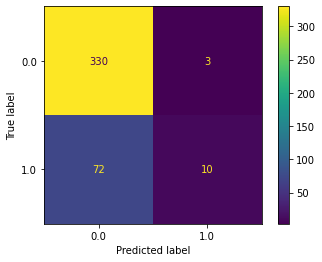

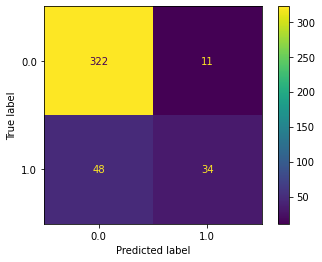

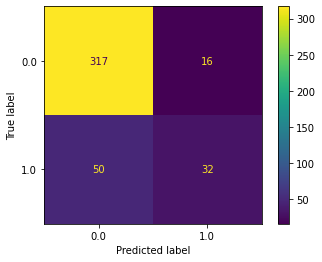

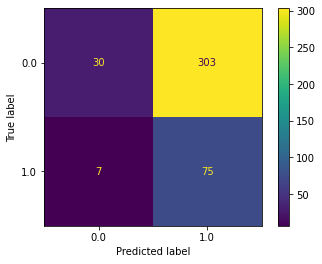

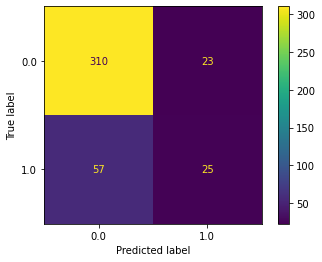

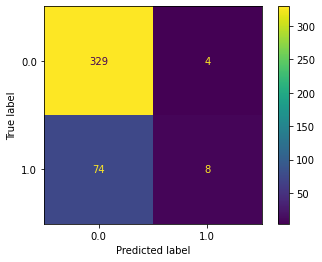

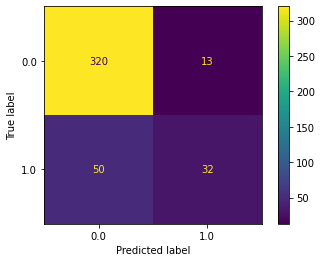

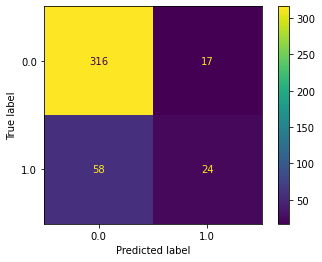

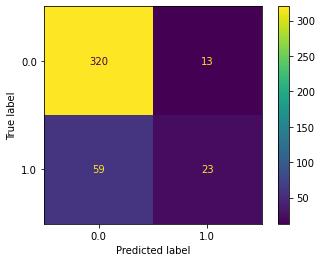

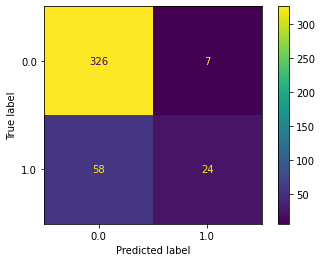

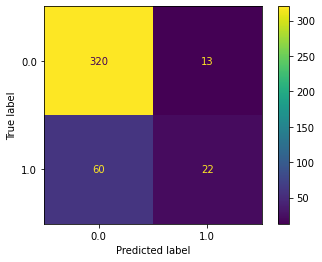

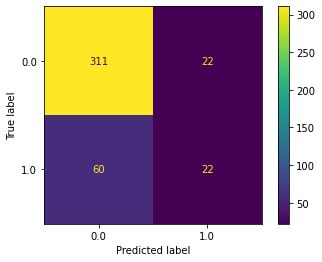

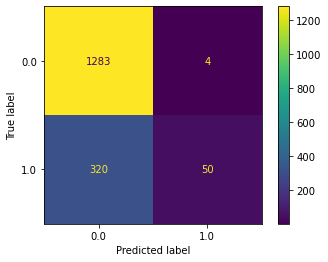

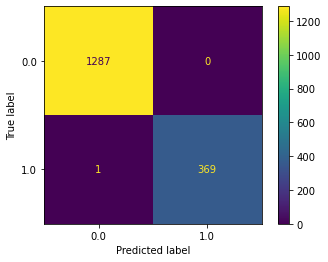

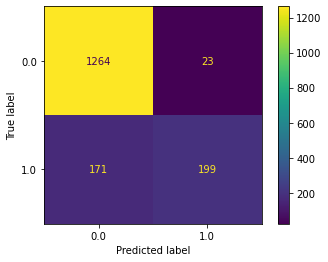

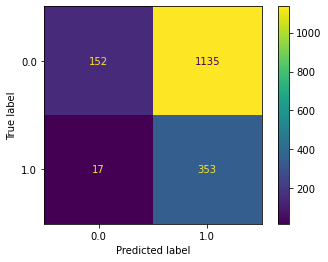

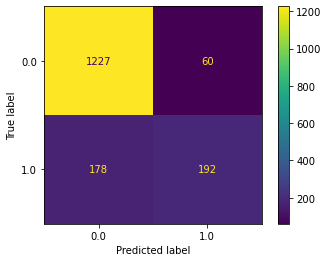

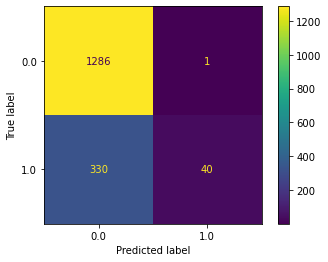

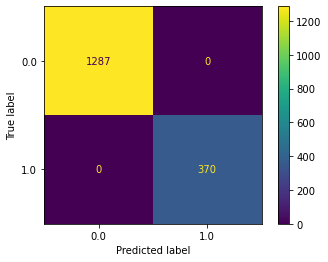

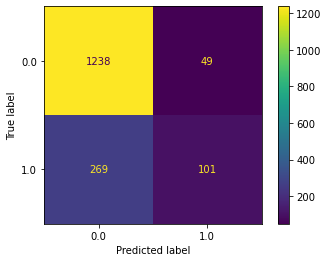

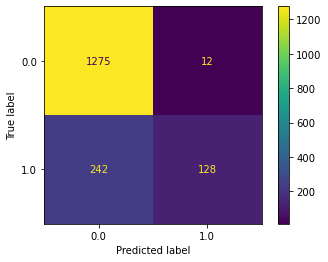

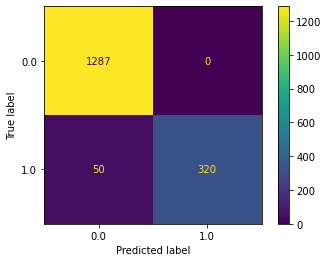

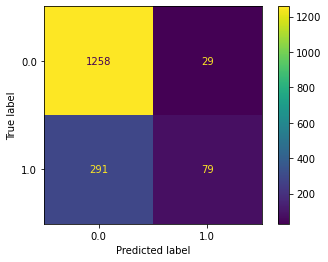

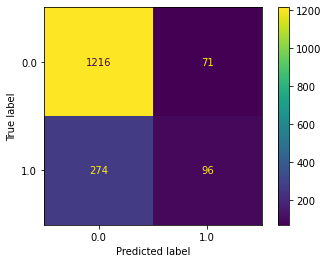

In [19]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)
p12=plot_confusion_matrix(mnb, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)
p24=plot_confusion_matrix(mnb, X_train, y_train)

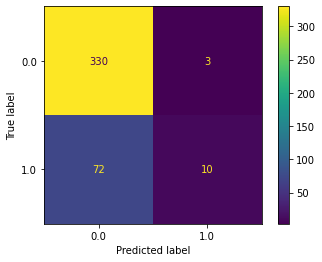

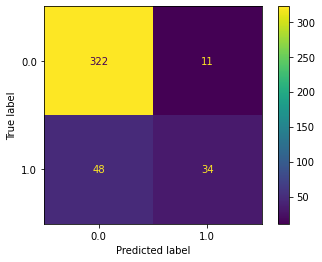

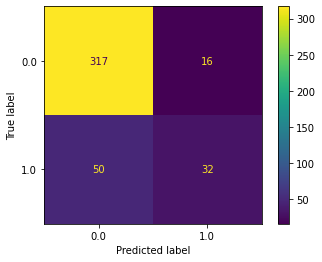

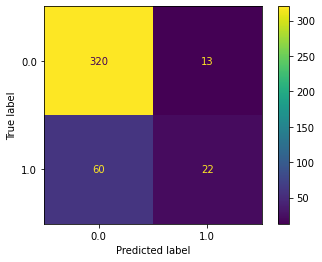

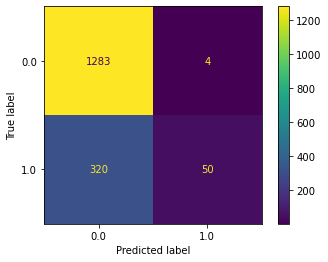

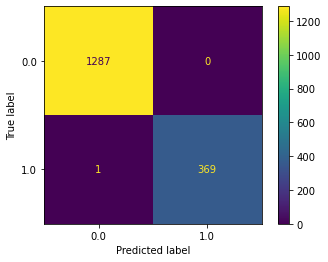

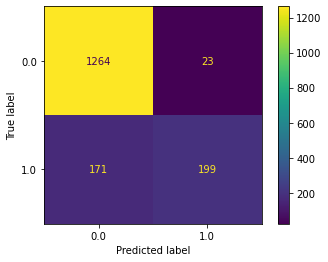

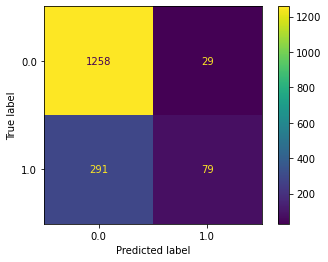

In [20]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

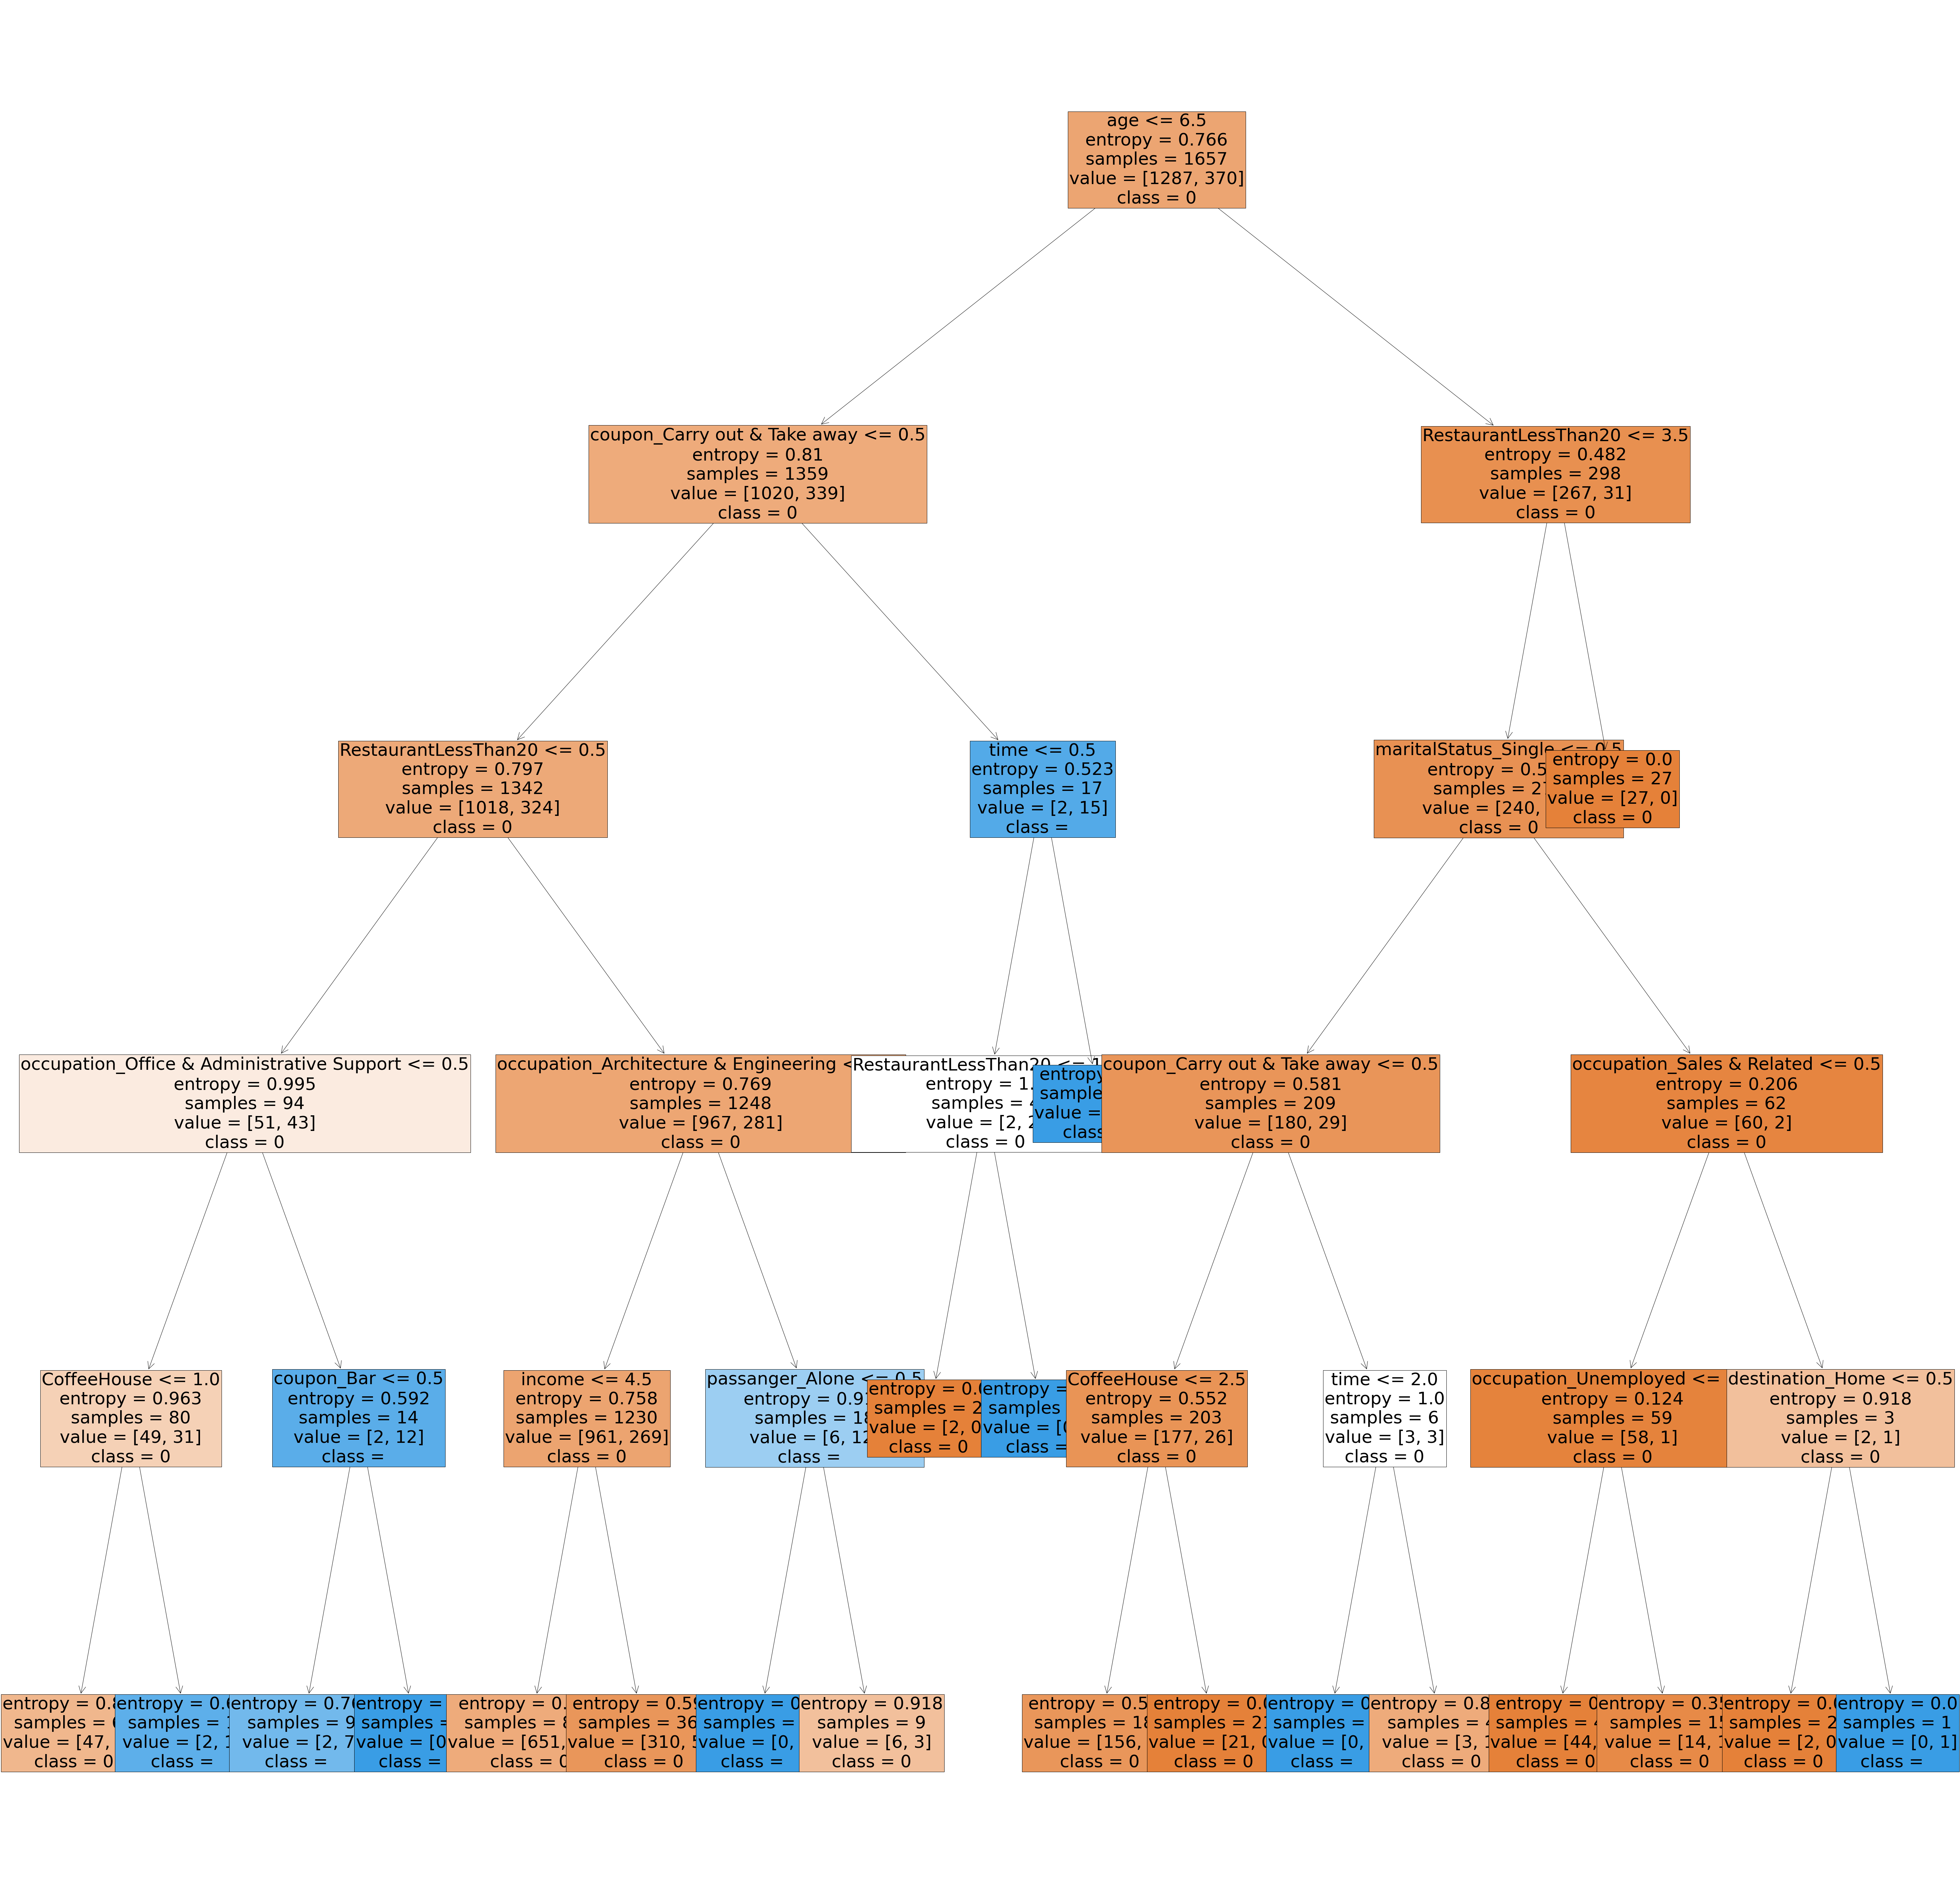

In [21]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_NEVER.png')


# Validating the Training set Accuracy

In [22]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)
mnb_pred1 = mnb.predict(X_train)

dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)
mnb_acc1 = accuracy_score(y_train, mnb_pred1)

dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)
mnb_auc1 = roc_auc_score(y_train, mnb_pred1)

print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)
print('multinomial: %.6f' % mnb_acc1)
print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)
print('multinomial: %.6f' % mnb_auc1)

Decision tree acc: 0.804466
Random forest acc: 0.999396
SVM acc: 0.882921
Nabive Baise acc: 0.304768
KNN: 0.856367
BAGGING: 0.800241
Extra tree: 1.000000
ADC Boosting: 0.808087
GDC Boosting: 0.846711
Logistic: 0.806880
BAGGING Random Forest: 0.969825
multinomial: 0.791792

Decision tree AUC: 0.566014
Random forest AUC: 0.998649
SVM AUC: 0.759983
gnb AUC: 0.536079
KNN AUC: 0.736149
Bagging AUC: 0.553666
Extra tree AUC: 1.000000
ADC Boosting: 0.617450
GDC Boosting: 0.668311
Logistic: 0.595490
BAGGING Random Forest: 0.932432
multinomial: 0.602146


In [23]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)
print(mnb)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x1D36EA23C40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x1D36EA23C40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x1D36EA23C40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x1D36EA23C40),
         

# Voting

In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))



In [26]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7856930509104423


# Explorative data analysis

In [3]:
from matplotlib import pyplot

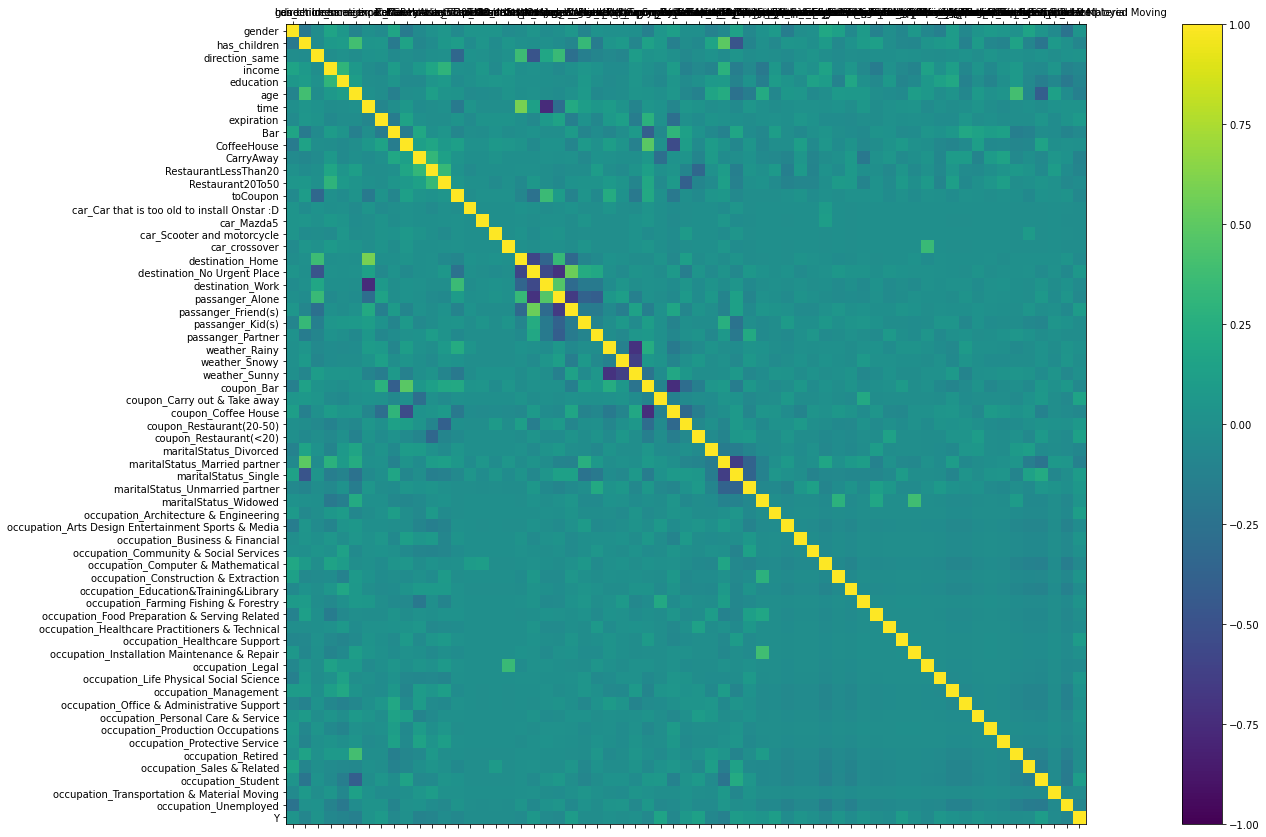

In [4]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df1.head()
ticks = np.arange(0,63,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x2=pyplot.show()

In [5]:
from pandas.plotting import scatter_matrix

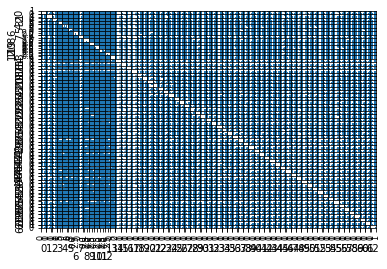

In [6]:
scatter_matrix(df)

pyplot.show()

In [7]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   53   54   55   56  \
0   0.0  1.0  0.0  3.0  2.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  1.0  3.0  2.0  1.0  3.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  3.0  2.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  5.0  4.0  1.0  1.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  5.0  4.0  1.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  5.0  4.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  1.0  2.0  6.0  1.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  1.0  2.0  6.0  3.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  1.0  2.0  6.0  0.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
9   0.0  1.0  0.0  5.0  2.0  2.0  1.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
10  0.0  1.0  1.0  5.0  2.0  2.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  5.0  2.0 

In [8]:
shape = df.shape
print(shape)

(2072, 63)


In [9]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
58    float64
59    float64
60    float64
61    float64
62    float64
Length: 63, dtype: object


In [10]:
from pandas import set_option

In [11]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df.describe()
print(description)

             0         1         2         3         4   ...        58        59        60        61        62
count  2072.000  2072.000  2072.000  2072.000  2072.000  ...  2072.000  2072.000  2072.000  2072.000  2072.000
mean      0.492     0.448     0.202     3.433     2.946  ...     0.112     0.123     0.009     0.169     0.218
std       0.500     0.497     0.402     2.375     1.248  ...     0.316     0.329     0.093     0.375     0.413
min       0.000     0.000     0.000     0.000     0.000  ...     0.000     0.000     0.000     0.000     0.000
25%       0.000     0.000     0.000     2.000     2.000  ...     0.000     0.000     0.000     0.000     0.000
50%       0.000     0.000     0.000     3.000     3.000  ...     0.000     0.000     0.000     0.000     0.000
75%       1.000     1.000     0.000     5.000     4.000  ...     0.000     0.000     0.000     0.000     0.000
max       1.000     1.000     1.000     8.000     5.000  ...     1.000     1.000     1.000     1.000     1.000



In [12]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    1620
1     452
dtype: int64


In [13]:
correlations = df1.corr(method='pearson')
print(correlations)

                                             gender  has_children  direction_same  income  education  ...  occupation_Sales & Related  occupation_Student  \
gender                                        1.000        -0.192      -2.227e-02   0.158      0.062  ...                   1.629e-01               0.037   
has_children                                 -0.192         1.000      -2.576e-02   0.085      0.094  ...                  -8.711e-02              -0.225   
direction_same                               -0.022        -0.026       1.000e+00  -0.011      0.015  ...                  -4.461e-04               0.020   
income                                        0.158         0.085      -1.083e-02   1.000      0.311  ...                  -3.402e-02              -0.039   
education                                     0.062         0.094       1.507e-02   0.311      1.000  ...                  -5.928e-02              -0.142   
...                                             ...       

In [14]:
skew = df.skew()
print(skew)

0     3.091e-02
1     2.098e-01
2     1.484e+00
3     4.893e-01
4     7.787e-04
        ...    
58    2.455e+00
59    2.296e+00
60    1.060e+01
61    1.764e+00
62    1.366e+00
Length: 63, dtype: float64


In [15]:
skew.to_csv('Skew2_NEVER.csv', index=False)

In [16]:
correlations.to_csv('correlations_NEVER.csv', index=False)

In [17]:
description.to_csv('description_NEVER.csv', index=False)

# Random Forest Tree

In [19]:
from sklearn.tree import export_graphviz

<Figure size 14400x11520 with 0 Axes>

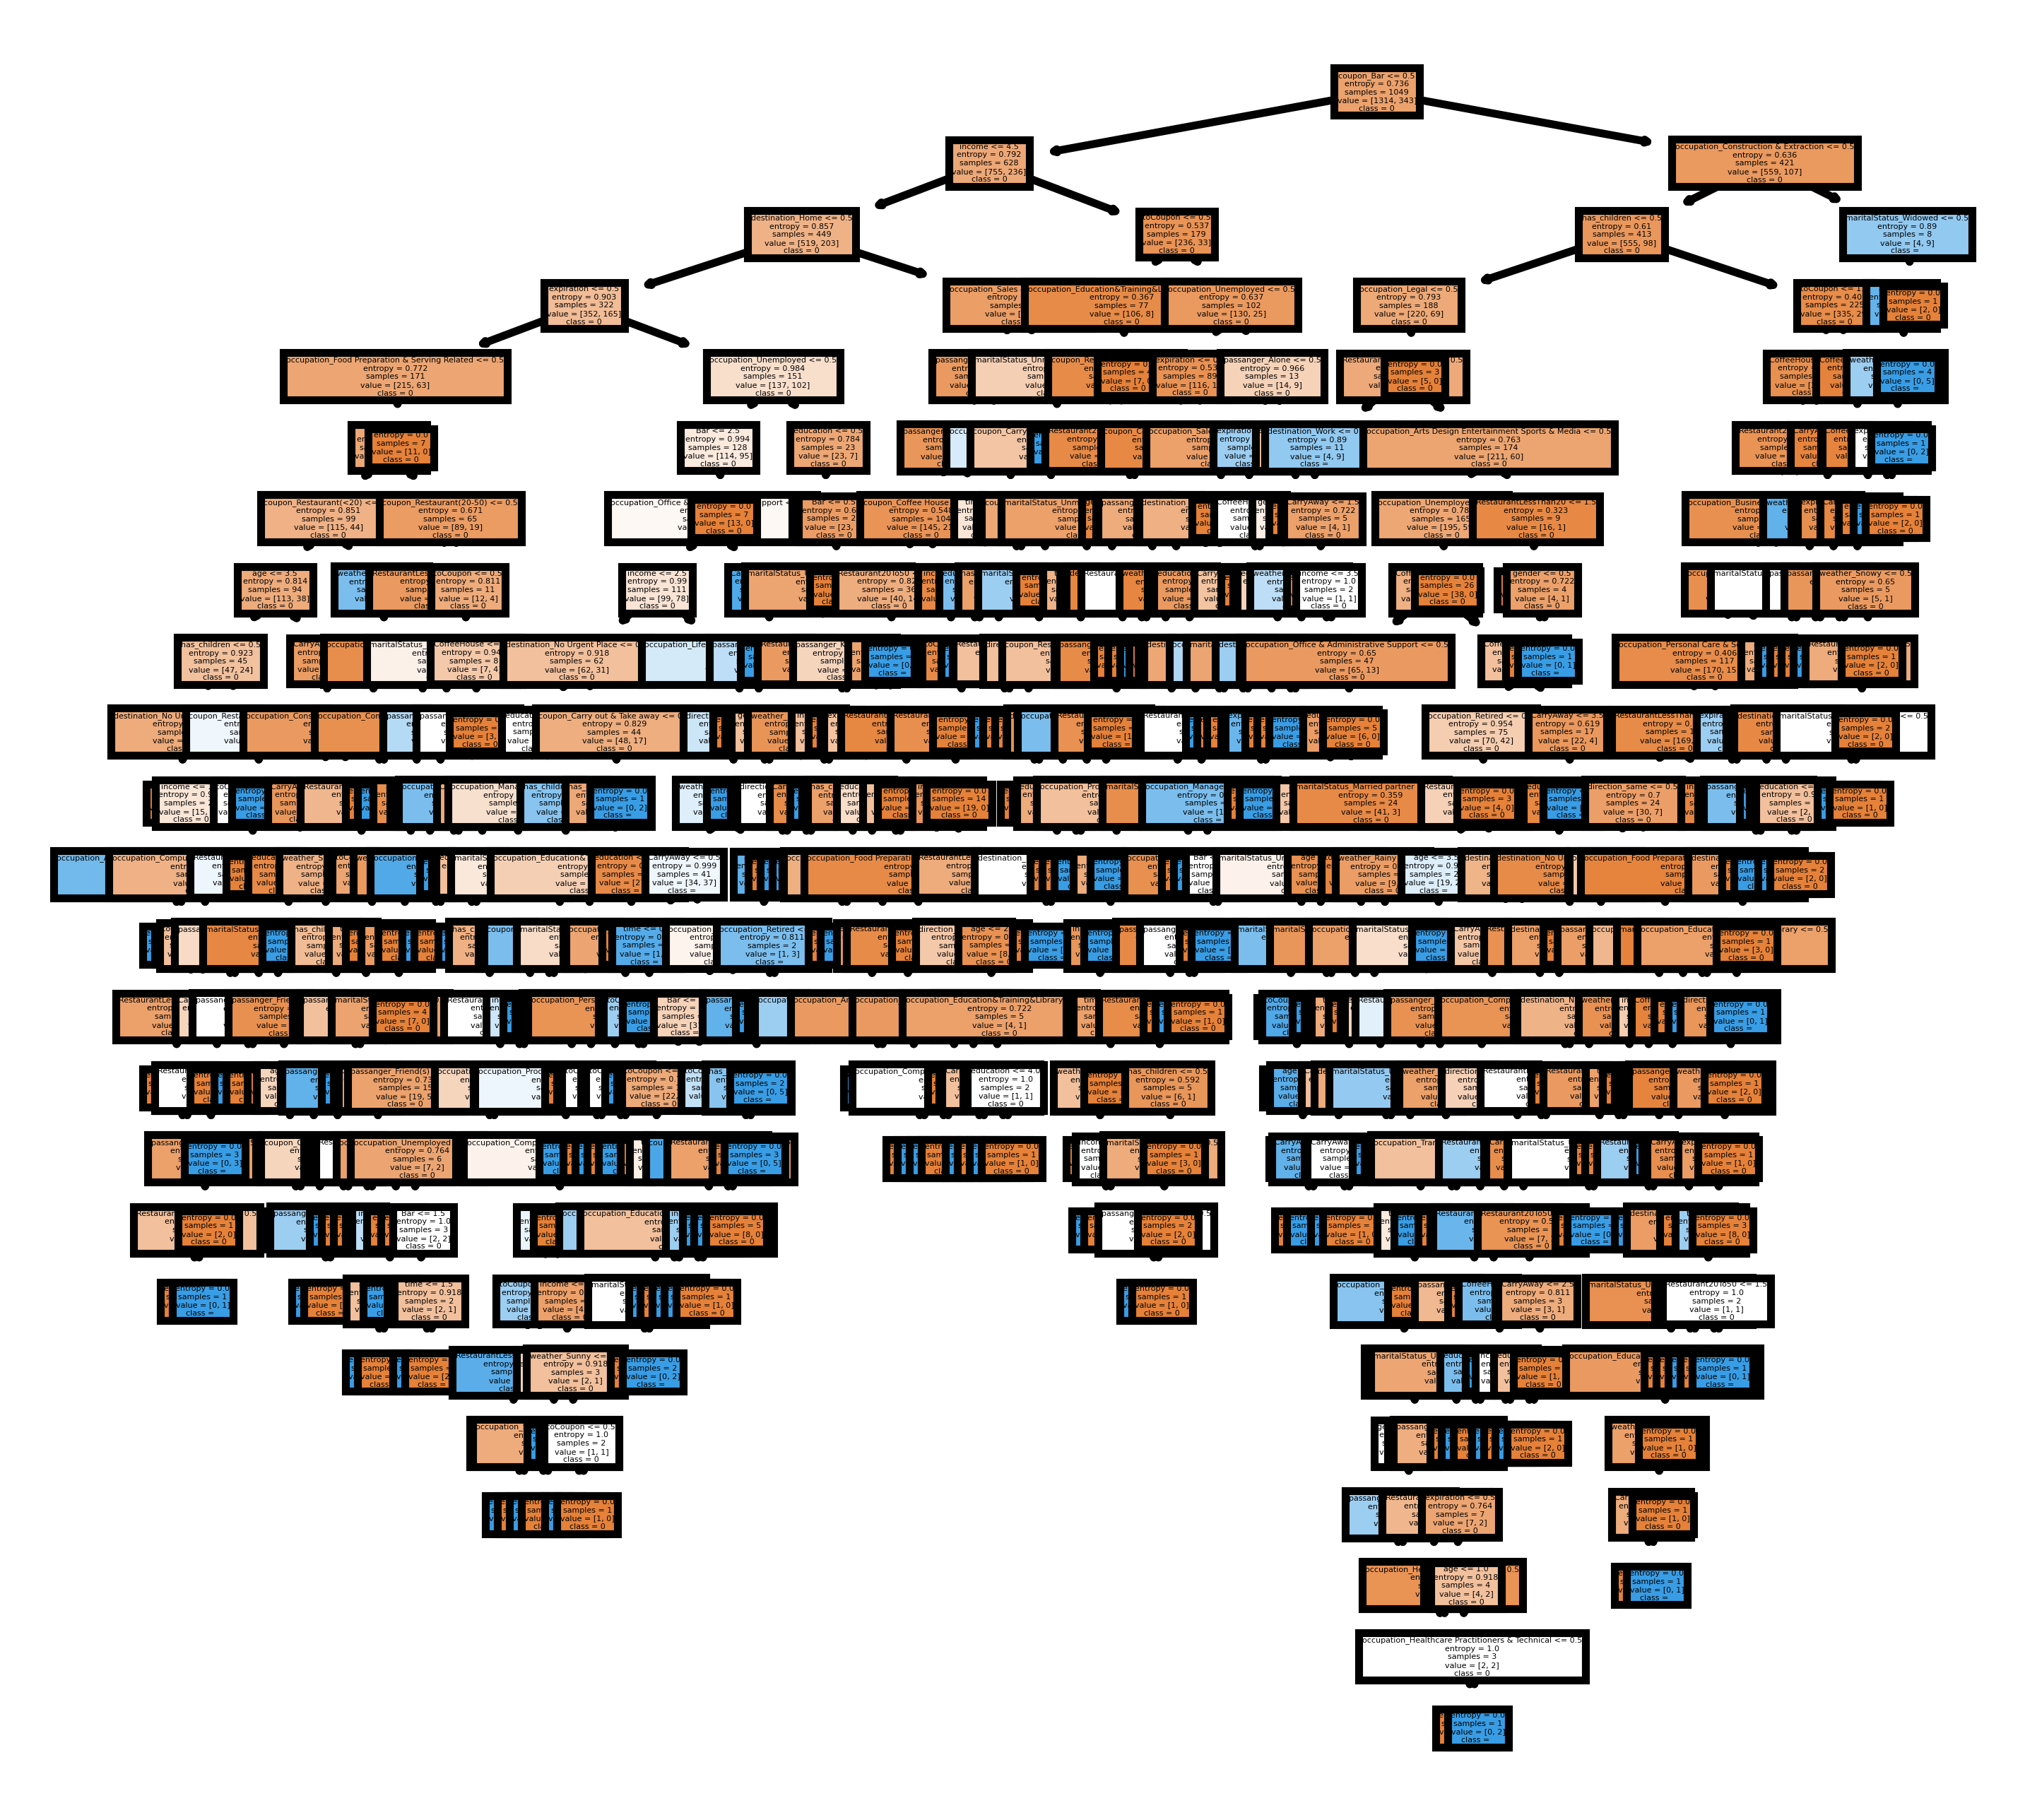

In [20]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_NEVER.png')